# Passwornd Strength

## Intorduction to Bussiness Problem

## Dataset Resources

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv', error_bad_lines=False)
data.shape
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data.shape

(669640, 2)

## Exploring Data

In [4]:
data['strength'].unique()

array([1, 2, 0])

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

<AxesSubplot:xlabel='strength', ylabel='count'>

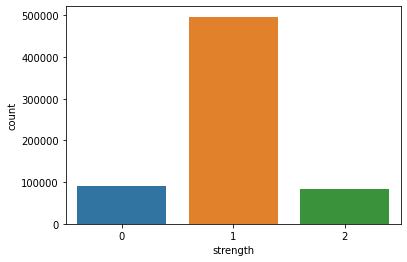

In [8]:
sns.countplot(data['strength'])

Convert our entire data into format of numpy array

In [9]:
password_tuple = np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

For now on, from this array we can easily or simply fetch data in the form of dependent as well as independent features as well. Before extracting independent and dependent feature from the data, we are going to shuffle our data so that it will provide robustness to our model. Because before passing the data for training purpose to any of the machine learning model, if we pass shuffle data, it will provide robustness to our model. So, let's begin with `import random` module, and then call a function `random.shuffle()` to our `password_tuple` it will shuffle our array. 

In [10]:
import random
random.shuffle(password_tuple)

So now from this array we have to extract dependent as well our independent feature. For independent data, we create a list of our first index, it means `[0]` in python, then we are going to store the entire data in `X` variable. While the dependent data, is in the second indext, meaning `[1]`.

In [11]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

## TF-IDF

### Apply TF-IDF on the Data

Now on, we will perform TF-IDF on our data. But, very first we have to make sure that the data we have must be a form of character. So, we are going to define our function that will basically split the parameter into characters.

In [12]:
def word_split(inputs):
  character=[]
  for i in inputs:
    character.append(i)
  return character

In [13]:
word_split('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

Now we are applying our TF-IDF using `TfidfVectorizer` from sklearn package.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

Define our vectorizer that achieve a matrix of our data by using `TfidfVectorizer` function

In [15]:
vectorizer = TfidfVectorizer(tokenizer=word_split)
X = vectorizer.fit_transform(x)

In [16]:
X.shape

(669639, 138)

See all the feature of our vectorizer variable.

In [17]:
vectorizer.get_feature_names()

['\x01',
 '\x02',
 '\x05',
 '\x06',
 '\x08',
 '\x10',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '\xa0',
 '¡',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 'ƒ',
 '—',
 '‚',
 '…',
 '‹',
 '›',
 '™']

In [18]:
first_vector_document = X[0]
first_vector_document

<1x138 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [19]:
first_vector_document.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56676354],
        [0.        ],
        [0.59230882],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [20]:
tf_idf = pd.DataFrame(first_vector_document.T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
tf_idf.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.592309
5,0.566764
z,0.335860
k,0.291648
d,0.285225
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


## Train the First Model

### Split to Train and Test Dataset



In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(535711, 138)

In [24]:
type(X)

scipy.sparse.csr.csr_matrix

In [25]:
print(y)

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 

### Train the Model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression(random_state=0, multi_class='multinomial')

In [28]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

### Evaluate the Model

In [29]:
predict_data = np.array(['123@#ghhgj'])
prediction = vectorizer.transform(predict_data)
clf.predict(prediction)

array([2])

In [30]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

In [31]:
from sklearn import metrics

In [32]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: '+str(round(accuracy*100,2))+'%')

Accuracy: 81.86%


### Log the Performance

In [33]:
performance_log = pd.DataFrame(columns=['Experiment', 'Accuracy'])

perform = {
    'Experiment': 'Logistic Regression',
    'Accuracy': str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perform, ignore_index=True)

In [34]:
performance_log

,Experiment,Accuracy
0,Logistic Regression,81.86%


## Modelling Experiment

### Find the Best Model

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
models = {
    'Logistic Regression': LogisticRegression(random_state=0, multi_class='multinomial'),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(criterion = 'entropy', random_state = 0)
}

for model_name, clf in models.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("Evaluate model: {}".format(model_name))
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: "+str(round(accuracy*100,2))+'%')
  print("\n")

Evaluate model: Logistic Regression
Accuracy: 81.86%


Evaluate model: Naive Bayes
Accuracy: 74.21%


Evaluate model: Decision Tree
Accuracy: 77.94%


Evaluate model: Random Forest
Accuracy: 98.3%




In [38]:
clf = RandomForestClassifier(criterion = 'entropy', random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Evaluate model: {}".format(model_name))

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: "+str(round(accuracy*100,2))+'%')

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confussion Matrix: ")
print("\n")
print(cm)

Evaluate model: Random Forest
Accuracy: 98.32%
Confussion Matrix: 


[[16793  1414     1]
 [  168 98868   180]
 [    4   483 16017]]


In [39]:
y_train_pred = clf.predict(X_train)

print("Evaluate model: {}".format(model_name))

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy: "+str(round(accuracy_train*100,2))+'%')
print("\n")

#confusion matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confussion Matrix: ")
print("\n")
print(cm_train)

Evaluate model: Random Forest
Accuracy: 98.32%


Confussion Matrix: 


[[ 72486     27      0]
 [    46 396556      0]
 [     0      5  66591]]


In [40]:
perform = {
    "Experiment": "Find The Best Model (RandomForest)",
    "Accuracy": str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perform, ignore_index=True)

In [41]:
performance_log

,Experiment,Accuracy
0,Logistic Regression,81.86%
1,Find The Best Model (RandomForest),98.32%


### Hyper-Parameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#List of Hyper-parameters will be tested
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 10, stop = 130, num = 5)], # Number of subtrees
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]+[None],  # Maximum depth of each subtree
                       min_samples_split = [2, 5, 10],
                       min_samples_leaf = [2, 5, 10]
                      )

In [48]:
hyperparameters

{'n_estimators': [10, 40, 70, 100, 130],
 'max_depth': [10, 43, 76, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [2, 5, 10]}

In [49]:
# Init
clf = RandomForestClassifier(criterion = 'entropy', random_state=123)
clf_tuned = RandomizedSearchCV(clf, hyperparameters, cv=3, random_state=12, scoring='f1_micro', n_iter=4)
clf_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=123),
                   n_iter=4,
                   param_distributions={'max_depth': [10, 43, 76, 110, None],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 40, 70, 100, 130]},
                   random_state=12, scoring='f1_micro')

In [62]:
# Predict & Evaluation
y_pred_tuned = clf_tuned.predict(X_test)

In [64]:
accuracy_tuned = metrics.accuracy_score(y_test, y_pred_tuned)
print("accuracy: "+str(round(accuracy_tuned*100,2))+'%')
print("\n")
#confusion matrix
cm_tuned = confusion_matrix(y_test,y_pred_tuned)
print("Confussion Matrix: ")
print("\n")
print(cm_tuned)

accuracy: 97.34%


Confussion Matrix: 


[[15738  2469     1]
 [  194 98812   210]
 [    5   678 15821]]


In [65]:
y_train_pred_tuned = clf_tuned.predict(X_train)
accuracy_train_tuned = metrics.accuracy_score(y_train, y_train_pred_tuned)
print("Accuracy: "+str(round(accuracy_train_tuned*100,2))+'%')
print("\n")

#confusion matrix
from sklearn.metrics import confusion_matrix
cm_train_tuned = confusion_matrix(y_train, y_train_pred_tuned)
print("Confussion Matrix: ")
print("\n")
print(cm_train_tuned)

Accuracy: 99.28%


Confussion Matrix: 


[[ 69740   2772      1]
 [   215 396318     69]
 [     7    782  65807]]


### Log Performance

In [69]:
perform = {
    "Experiment": "Hyper-Parameter tuning",
    "Accuracy": str(round(accuracy_tuned*100,2))+'%'
}
performance_log = performance_log.append(perform, ignore_index=True)

**Check the Best Hyper-Prameters**

In [67]:
for key, value in hyperparameters.items() :
        print(key+':', clf_tuned.best_estimator_.get_params()[key])

n_estimators: 70
max_depth: 110
min_samples_split: 2
min_samples_leaf: 2


In [70]:
performance_log

,Experiment,Accuracy
0,Logistic Regression,81.86%
1,Find The Best Model (RandomForest),98.32%
2,Hyper-Parameter tuning,98.32%
3,Hyper-Parameter tuning,98.32%
4,Hyper-Parameter tuning,97.34%


In [71]:
import pickle

filename='api/model_password_strengt_2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [72]:
filename_2='api/vectorizer_password_strength_2.sav'
pickle.dump(vectorizer, open(filename_2, 'wb'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5ab88d5b-f753-4c0d-9d83-3117bfcaa032' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>